In [1]:
!pip install yfinance
#yfinance는 Yahoo Finance에 있는 금융 데이터를 파이썬을 통해 쉽게 가져올 수 있게 해주는 무료 오픈소스 라이브러리

In [52]:
import yfinance as yf

df = yf.download("AAPL",start='2023-01-01',auto_adjust=False)
#auto_adjust: 주가 조정(adj_close(종가)값이 나오게 하려면 False)
df = df[['Open','High','Low','Close','Volume','Adj Close']]
df

[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume,Adj Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,112117500,123.330650
2023-01-04,126.889999,128.660004,125.080002,126.360001,89113600,124.602707
2023-01-05,127.129997,127.769997,124.760002,125.019997,80962700,123.281326
2023-01-06,126.010002,130.289993,124.889999,129.619995,87754700,127.817375
2023-01-09,130.470001,133.410004,129.889999,130.149994,70790800,128.339996
...,...,...,...,...,...,...
2025-10-16,248.250000,249.039993,245.130005,247.449997,39777000,247.449997
2025-10-17,248.020004,253.380005,247.270004,252.289993,49147000,252.289993


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 704 entries, 2023-01-03 to 2025-10-22
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Open, AAPL)       704 non-null    float64
 1   (High, AAPL)       704 non-null    float64
 2   (Low, AAPL)        704 non-null    float64
 3   (Close, AAPL)      704 non-null    float64
 4   (Volume, AAPL)     704 non-null    int64  
 5   (Adj Close, AAPL)  704 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 38.5 KB


In [54]:
print("기간: " , df.index.min(),df.index.max())
print("전체 데이터 수 ?:" , len(df))
print("결측치 갯수:", df.isna().sum())

기간:  2023-01-03 00:00:00 2025-10-22 00:00:00
전체 데이터 수 ?: 704
결측치 갯수: Price      Ticker
Open       AAPL      0
High       AAPL      0
Low        AAPL      0
Close      AAPL      0
Volume     AAPL      0
Adj Close  AAPL      0
dtype: int64


In [55]:
desc = df.describe().T
desc['IQR'] = desc['75%'] - desc['25%']

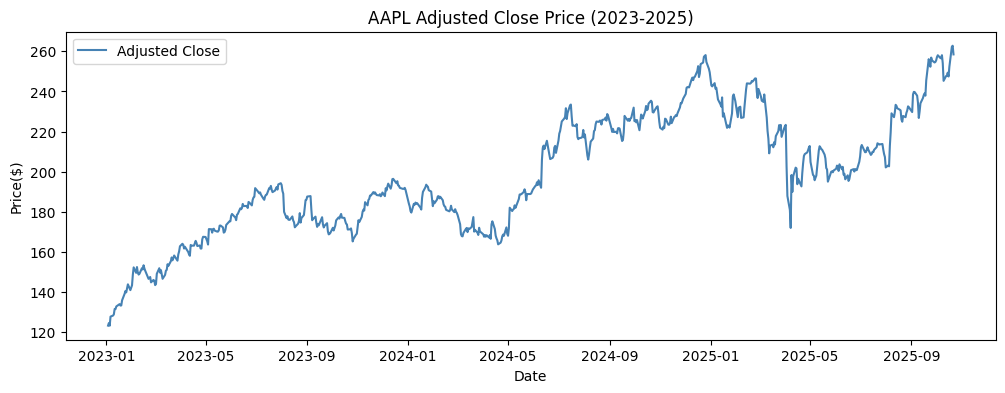

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(df['Adj Close'], label='Adjusted Close' ,color='steelblue')
plt.title('AAPL Adjusted Close Price (2023-2025)')
plt.xlabel('Date'); plt.ylabel('Price($)')
plt.legend();plt.show()

In [57]:
df['Rate'] = df['Close'].pct_change() #변동성
#pct_change(): DataFrame의 각요소에 대해 이전 값과 백분율 변화를 계산하는 메서드
#df['Return'] = df['Close','AAPL'].pct_change()

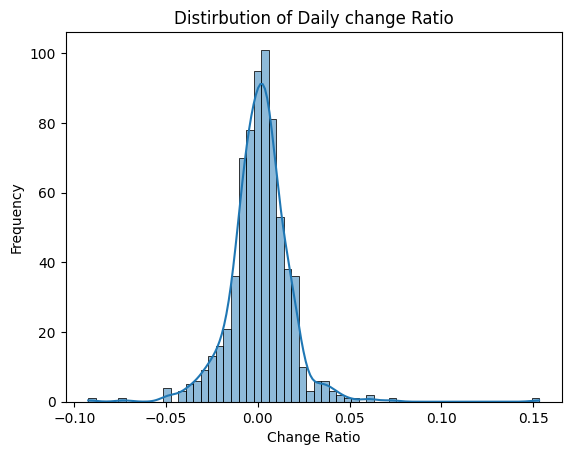

왜도:  nan
첨도:  nan


In [58]:
import seaborn as sns
#정규분포 형태인가?
sns.histplot(df['Rate'].dropna(),bins=60,kde=True)
plt.title('Distirbution of Daily change Ratio')
plt.xlabel('Change Ratio');plt.ylabel('Frequency')
plt.show()

#왜도,첨도 평가
from scipy.stats import skew,kurtosis
print("왜도: ", skew(df['Rate']))
print("첨도: ", kurtosis(df['Rate']))
#왜도와 첨도가 NaN인 이유는 pct_change()의 첫행이 NaN이다.
#분산이 0이면 -> 측정이 불가능.

# 정규성 검정
 - 정규분포인지 아닌지?
 - 귀무가설($H_0$): 데이터는 정규분포를 따른다.
 - 대립가설($H_1$): 데이터는 정규분포를 따르지 않다.

-> Shapiro-wilk test, Normality Test

In [59]:
data = df['Rate'].dropna()

n = min(1000, len(data))
sample = data.sample(n,random_state=42,replace=(len(data)<1000))
#replace : 복원추출을 할지 말지를 결정하는 매개변수

from scipy.stats import shapiro, normaltest
stat1, p1 = shapiro(sample)
stat2, p2 = normaltest(sample)
print(f"shapiro-wilk p={p1:.5f}, D'agostiono p ={p1:.5f}")
#D'agostino p : D'Agostino's K^2 정규성 검정 -> p-value결과를 의미 <0.05
#-> 데이터가 정규분포(가우시안)를 따르는가? -> 통계적 가설검정.


shapiro-wilk p=0.00000, D'agostiono p =0.00000


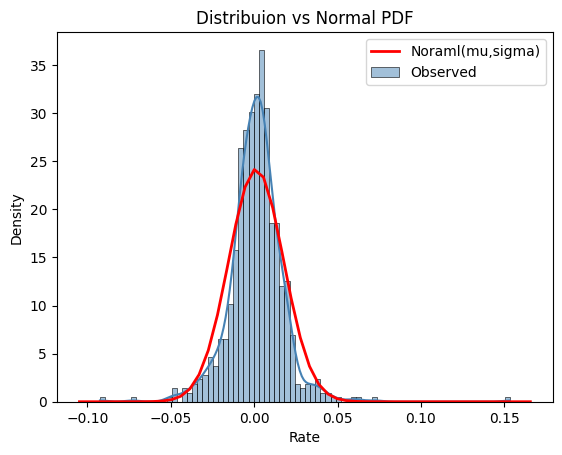

In [60]:
from scipy import stats
import numpy as np
sns.histplot(data,bins=80, kde=True, stat="density", color='steelblue',label='Observed')
xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax)
p = stats.norm.pdf(x,np.mean(data), np.std(data))
plt.plot(x,p,'r', linewidth=2, label='Noraml(mu,sigma)')
plt.legend();plt.title('Distribuion vs Normal PDF')
plt.show()

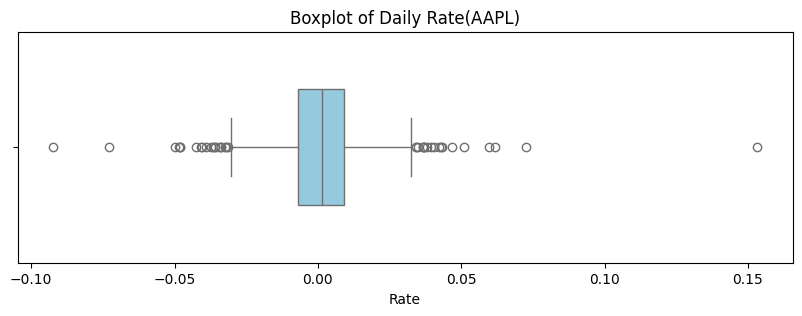

In [61]:
plt.figure(figsize=(10,3))
sns.boxplot(x=data, color='skyblue',width=0.5)
plt.title("Boxplot of Daily Rate(AAPL)")
plt.show()

In [62]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers_iqr = data[(data<lower) | (data>upper)]
print(f"IQR 하한 : {lower:.4f}, IQR 상한 : {upper:.4f}")
print(f"이상치 개수 : {len(outliers_iqr)} ({len(outliers_iqr) / len(data)*100:.2f})%")

IQR 하한 : -0.0306, IQR 상한 : 0.0328
이상치 개수 : 39 (5.55)%


- 이동평균과 변동성(시간 흐름의 안정성 확인)
    - rolling()은 최근 n일치 데이터만을 사용해서 평균, 분산, 표준편차 등을 계산하는 윈도우 연산

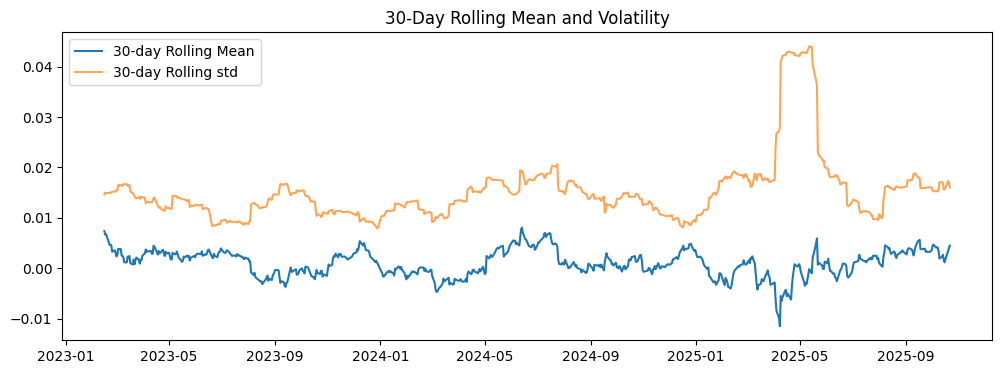

In [63]:
window = 30
rolling_mean = data.rolling(window).mean()
rolling_std = data.rolling(window).std()

plt.figure(figsize=(12,4))
plt.plot(rolling_mean,label=f'{window}-day Rolling Mean')
plt.plot(rolling_std,label=f'{window}-day Rolling std',alpha=0.7)
plt.legend()
plt.title(f'{window}-Day Rolling Mean and Volatility')
plt.show()

- 거래량과 변동성의 관계 (상관계수-> 자기상관계수)

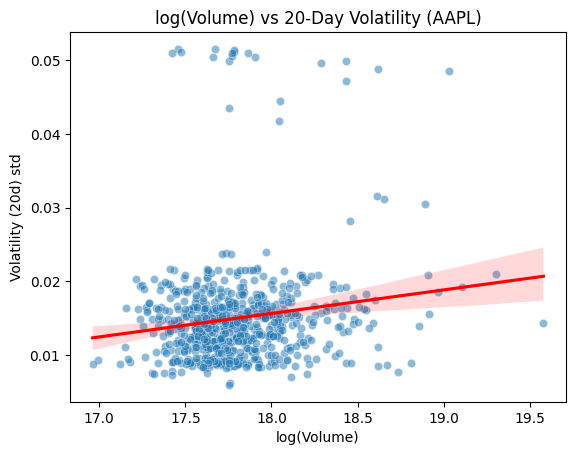

상관계수 r=0.148,p-value=0.000


In [64]:
df['rate'] = df['Close'].pct_change()
df['vol20'] = df['rate'].rolling(20).std()

S = df[['Volume','vol20']].dropna()
S['log_vol'] = np.log(S['Volume'])

sns.scatterplot(x=S['log_vol'], y=S['vol20'],alpha=0.5)
sns.regplot(x=S['log_vol'], y=S['vol20'],scatter=False, color='red')
plt.title('log(Volume) vs 20-Day Volatility (AAPL)')
plt.xlabel('log(Volume)'); plt.ylabel('Volatility (20d) std')
plt.show()

#상관계수
from scipy.stats import pearsonr
r,p = pearsonr(S['log_vol'],S['vol20'])
print(f'상관계수 r={r:.3f},p-value={p:.3f}')

- 거래량이 많을수록 단기 가격 변동이 커짐(시간 불안정성 증가)

In [ ]:
#스무딩(중심창 이동평균) → 미분 안정화
w = 7  # 창 크기. 더 크면 부드럽고 민감도는 낮아짐
df['close_s'] = df['Close'].rolling(w, center=True).mean()

# 1차·2차 미분(차분) 근사
df['d1'] = df['close_s'].diff()          # 기울기
df['d2'] = df['d1'].diff()               # 굽음(곡률 부호)

# 극값(최대/최소): d1 부호 교차로 검출
max_idx = df.index[(df['d1'].shift(1) > 0) & (df['d1'] <= 0)]
#이전 시점(shift(1))에는 양수였는데 음수로 전환점
min_idx = df.index[(df['d1'].shift(1) < 0) & (df['d1'] >= 0)]
#이전 시점(shift(1))에는 음수였는데 양수로 전환점

#평탄구간(0연속)
if (df['d1'] == 0).any():
    flat_idx = df.index[(df['d1'] == 0) & (df['d1'].shift(1) == 0)]
else:
    flat_idx = pd.Index([])  # empty index to avoid NameError

# 굴절점(인플렉션): d2 부호 교차(0을 지나감)로 검출
infl_idx = df.index[(df['d2'] * df['d2'].shift(1) < 0)]

# 시각화
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(df.index, df['Close'], label='Close', alpha=0.5)
ax.plot(df.index, df['close_s'], label=f'Smoothed MA({w})', lw=2)
#lw=1: 얇은선, lw=2:중간 두께, lw=5: 굵은선

ax.scatter(max_idx, df.loc[max_idx, 'Close'], marker='v', color='red', label='Local Max')
ax.scatter(min_idx, df.loc[min_idx, 'Close'], marker='^', color='green', label='Local Min')
ax.scatter(infl_idx, df.loc[infl_idx, 'Close'], marker='o', facecolors='none', edgecolors='orange', label='Inflection')
ax.scatter(flat_idx, df.loc[flat_idx, 'Close'], marker='s', color='gray', label='Flat')


ax.set_title('Turning points by 1st/2nd differences')
ax.legend(); plt.show()
import pandas as pd
# 결과 요약
print(f"Max: {len(max_idx)}개, Min: {len(min_idx)}개, Inflection: {len(infl_idx)}개")
print("예시 인덱스(앞 5개):")
print("Max:\n", pd.Series(max_idx).head().dt.strftime('%Y-%m-%d').to_list())
print("Min:\n", pd.Series(min_idx).head().dt.strftime('%Y-%m-%d').to_list())
print("Infl:\n", pd.Series(infl_idx).head().dt.strftime('%Y-%m-%d').to_list())
# print("flat:\n", pd.Series(infl_idx).head().dt.strftime('%Y-%m-%d').to_list())#값이 없음

- 결측치-> 보간법(Interpolation), 평균,분위수(중위수),보간법(fillna(method=fbill,.....앞,뒤,왼쪽,오른쪽...)
평균->전체? 각 칼럼에 평균 각각 결측치에 넣을거냐?

# 극값 기반으로 상승,하락 구간을 시각화, 각 구간의 평균 변화율(기울기)

/tmp/ipython-input-816096040.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if pd.isna(float(start_price)) or pd.isna(float(end_price)) or float(start_price) == 0:
/tmp/ipython-input-816096040.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rate = float((end_price - start_price) / start_price * 100.0) #%
/tmp/ipython-input-816096040.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if pd.isna(float(start_price)) or pd.isna(float(end_price)) or float(start_price) == 0:
/tmp/ipython-input-816096040.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rate = float((end_price - start_pri

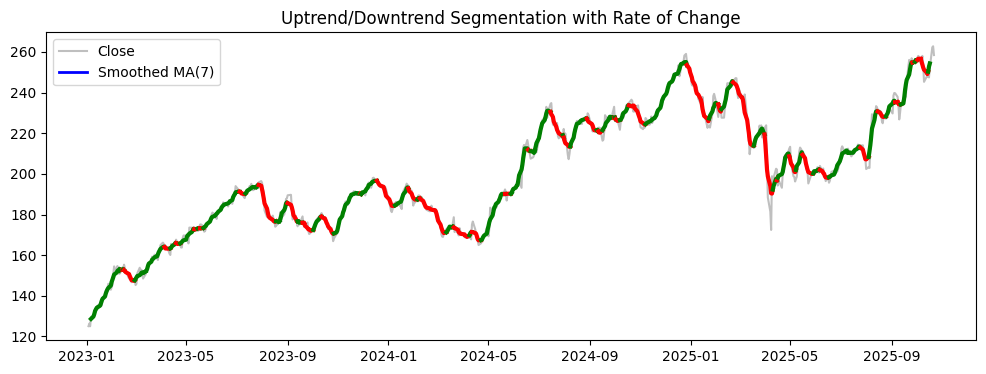

Number of segments: 107
Average Uptrend Rate: 4.21%
Average Downtrend Rate: -3.80%

Top 5 segments:
       start        end  direction    rate(%)
0 2023-01-03 2023-02-09    Uptrend  20.628444
1 2023-02-09 2023-02-10    Uptrend   0.092795
2 2023-02-10 2023-02-13    Uptrend   1.880678
3 2023-02-13 2023-02-14  Downtrend  -0.422495
4 2023-02-14 2023-02-15    Uptrend   1.390343


In [66]:
#구간 경계 구성
turn_idx = (max_idx.union(min_idx)).sort_values()
if len(turn_idx) == 0:
    #극값이 없으면 전체를 하나의 구간으로 처리
    turn_idx = pd.Index([df.index[0], df.index[-1]])
else:
    #시작/끝 경계 포함
    turn_idx = turn_idx.insert(0, df.index[0])
    turn_idx = turn_idx.append(pd.Index([df.index[-1]]))

#구간별 변화율 계산
segments = []
for i in range(len(turn_idx) - 1):
    start, end = turn_idx[i], turn_idx[i + 1]
    if start == end:
        continue # 0-길이 구간 방지

    # 스칼라 강제(중복 인덱스 대응)
    start_price = df.loc[[start], 'Close'].iloc[0]
    end_price   = df.loc[[end],   'Close'].iloc[0]

    # NaN 방지(스무딩 가장자리 등)
    if pd.isna(float(start_price)) or pd.isna(float(end_price)) or float(start_price) == 0:
        continue

    rate = float((end_price - start_price) / start_price * 100.0) #%
    direction = 'Uptrend' if rate > 0 else ('Downtrend' if rate < 0 else 'Flat')
    segments.append((start, end, direction, rate))

seg_df = pd.DataFrame(segments, columns=['start', 'end', 'direction', 'rate(%)'])

# 시각화, 상승=초록, 하락=빨강, 평탄=회색
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df.index, df['Close'], color='gray', alpha=0.5, lw=1.5, label='Close')
ax.plot(df.index, df['close_s'], color='blue', lw=2, label=f'Smoothed MA({w})')

for _, row in seg_df.iterrows():
    color = 'green' if row['direction'] == 'Uptrend' else 'red' if row['direction'] == 'Downtrend' else 'gray'
    ax.plot(df.loc[row['start']:row['end'], 'close_s'], color=color, lw=3)

ax.set_title('Uptrend/Downtrend Segmentation with Rate of Change')
ax.legend()
plt.show()

# 요약 : 평균 상승률/하락률
mean_up = seg_df.loc[seg_df['direction'] == 'Uptrend', 'rate(%)'].mean()
mean_down = seg_df.loc[seg_df['direction'] == 'Downtrend', 'rate(%)'].mean()

print(f"Number of segments: {len(seg_df)}")
print(f"Average Uptrend Rate: {mean_up:.2f}%") #NaN이면 상승 구간 없음
print(f"Average Downtrend Rate: {mean_down:.2f}%") #NaN이면 하락 구간 없음
print("\nTop 5 segments:")
print(seg_df.head())
